# Assignment 5

**Computer info:** MacBook Air, Chip: Apple M1, Ram: 8GB, macOs 13.4.1, 2020

<div class="alert alert-warning">
<strong>Instructions for Cell Execution:</strong>

1. Execute the cell under "Used Libraries as first".
2. Run the cells in the order they appear.
3. There is an Extra part (that you can safely skip), where I've made some experiments.
</div>

> Let us assume that your measurement data consists of n = 20 observations, the average of which is $\bar{x}$= 30 and variance $s^2 = 20$; this is sufficient statistics for the data. A judicious assumption is that measured values are normally distributed. The posterior distribution for the mean $\mu$ and precision $\tau$($=\frac{1}{\sigma^2}$) was found to be of the form:
$$\pi(\mu,\tau |x) \propto \tau^{a-1+\frac{n}{2}}\exp{\{-\frac{\tau}{2}\left[(n-1)s^2+n(\bar{x}-\mu)^2\right]-\frac{d}{2}(\mu-c)^2-b\tau\}} $$
(Lecture 5, p. 14.)

>In the book (Wilkinson, SMSB), the full conditionals for the parameters of the normal distribution are “derived” (in fact, given) (Lecture 5, p. 15):
$$\tau|\mu,x\sim Ga\left(a+\frac{n}{2},b+\frac{1}{2}[(n-1)s^2+n(\bar{x}-\mu)^2]\right)\text{,}$$
$$\mu|\tau,x\sim N\left(\frac{cd+n\tau\bar{x}}{n\tau+d},\frac{1}{n\tau+d}\right)\text{.}$$

>Implement the Gibbs sampler algorithm and use it to plot the joint distribution for $\mu$ and $\tau= 1/\sigma^2$! and the marginal distributions for $\mu$ and $\tau$. Choose parameter values $a=b=
1$, $c = 3$,$ d= 1/100$. As initial values (called prior means, often used as the starting point for sampling) for mean and precision use $\mu= a/c$ and $\tau = c$. Do 100'000 iterations (= samples). Plot marginal values of $\mu$ vs iteration steps, marginal distribution for $\mu$,
marginal values of $\tau$ vs iteration steps, marginal distribution for $\tau$, and the joint posterior distribution for $\mu$ and $\tau$(five plots. 1p for each plot and each printed value).

>Compute and print the mean values for these parameters. (In other words, produce results similar (but not identical) to those in the SMSB book: Fig. 10.4 (3rd edition, the pdf of the book).) This should be reasonably straightforward a task with the hint given below, so in order for it to be useful for you, please refer to Lecture 5, especially page 18, and make sure you understand how your algorithm relates to the described Gibbs sampling procedure and the used notation. (Peershave: “No need to report anything about this last part.”)


> Hint: This would be something to write an algorithm for without any model, but it would be unfair if some found it and others did not. So, take a peek at the function implemented in R in Figure 10.2 in Wilkinson.

>Note: There is a ‘burn-in’ period before convergence is reached, the corresponding values should be discarded before analysis takes place. In general, one should also check the burnin time. Here, the burn-in time is negligible, so it should not affect your results. You can easily check for this by discarding different numbers of initial steps and see if this has any effect. As said, in this case it should not. (Peershave: “No need to report anything about this part, either.”)

>Note for those using random.normal: Please note that, unlike in the standard notation used by the book, where the normal distribution is defined as $N$ (mean, variance), python’s random.normal is defined as random.normal(mean, standard deviation), so take care of using correct parameter values in order for you to belong to the lucky group of peergrave diggers having identical plots. (Continued on the next page.)

>Note for those using random.gamma: By request, I add here the same sort of note as for random.normal. As all the assignments, this one also uses the book’s and lecture notes’ notation $Ga(\alpha, \beta).$. If you are using python’s random.gamma, then take note that this function is defined as $Ga(k, \theta)$, where $k = \alpha$ and $\theta = 1/\beta$. (In the model solution the gamma function is written - no library routines; that’s short and easy, but you are allowed
to use the library gamma here.)


<div class="alert alert-info">
<strong>Instructions for Exercise Reading:</strong>
    
The following section will be organized as follows: for each point, you will first see the required function, followed by a test, and finally, the required comments.
</div>

Fistly, we start by implementing two functions by using Lecture notes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, expovariate
import math
import random

#change palette
import seaborn as sns
from matplotlib import colors
sns.set(rc={"axes.facecolor":"#FAEBD7" , "figure.facecolor":"#FFEFDB"})

In [2]:
# Function to perform Gibbs sampling
def gibbs_sampler(N, n, a, b, cc, d, xbar, ssquared, initial_mu, initial_tau, num_iterations):
    samples = np.zeros((num_iterations, 2))
    mu = initial_mu
    tau = initial_tau
    
    for i in range(num_iterations):
        # Sample tau from the conditional posterior
        tau = np.random.gamma(a + n / 2, 1 / (b + 0.5 * ((n - 1) * ssquared + n * (xbar - mu) ** 2)))
        
        # Sample mu from the conditional posterior
        mu = np.random.normal((cc * d + n * tau * xbar) / (n * tau + d), 1 / np.sqrt(n * tau + d))
        
        # Store the samples
        samples[i, :] = [mu, tau]
    
    return samples

In [3]:
# Parameters
N = 100000  # Number of iterations
n = 20  # Number of observations
a = 1
b = 1
c = 3
d = 1 / 100
xbar = 30
ssquared = 20
initial_mu = a / c
initial_tau = c

Mean of mu: 29.73550408402782
Mean of tau: 0.05470878026738358


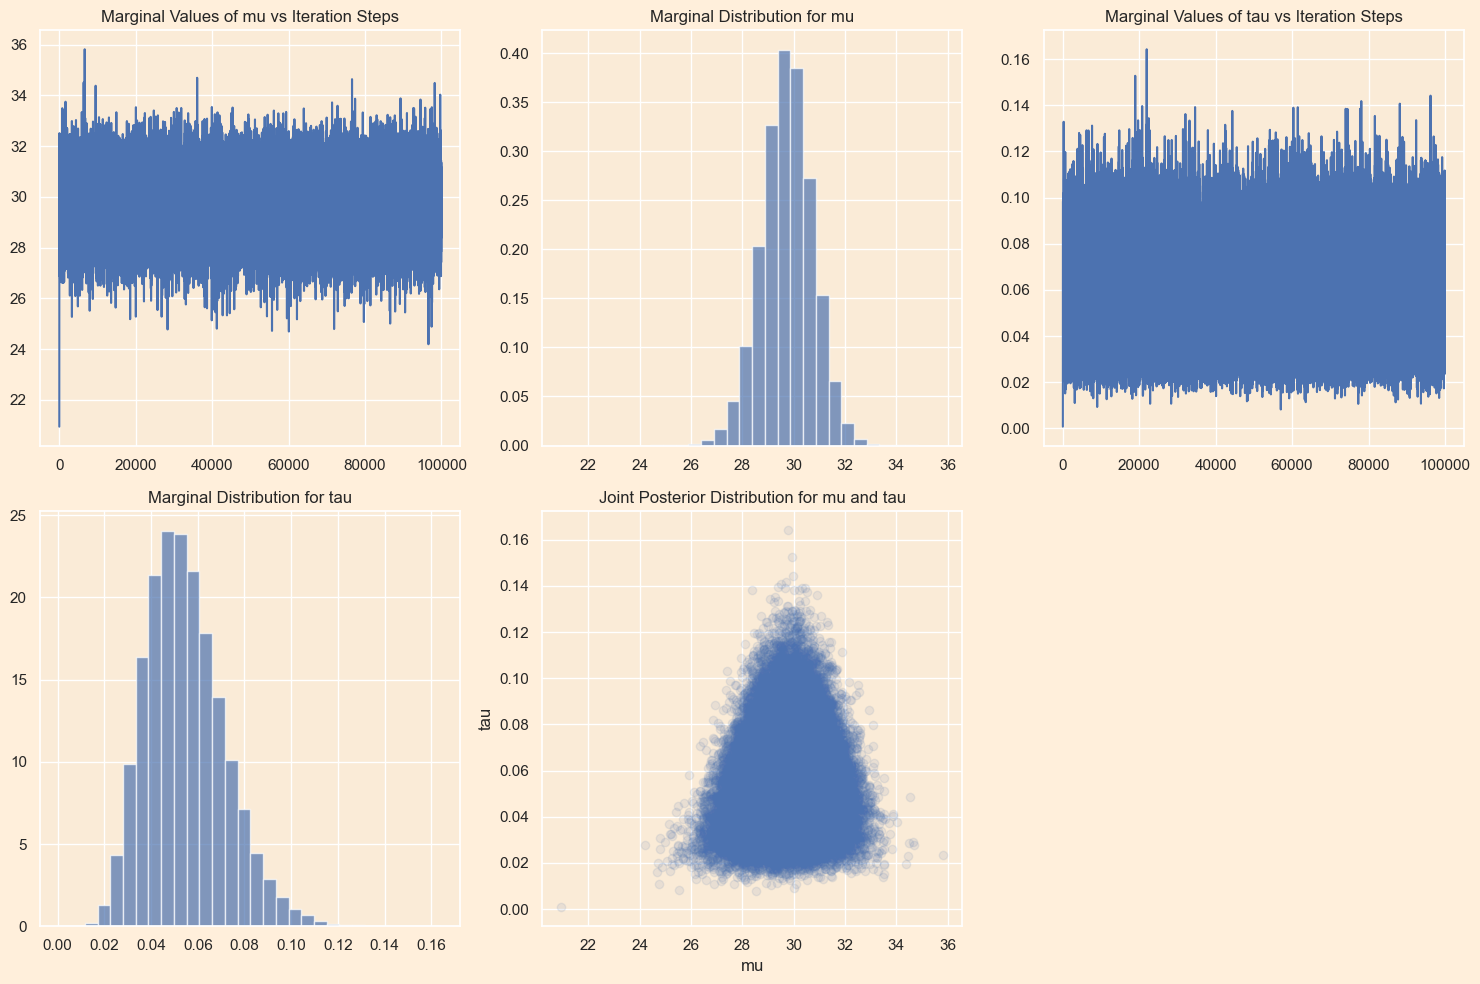

In [4]:
# Run the Gibbs sampler
samples = gibbs_sampler(N, n, a, b, c, d, xbar, ssquared, initial_mu, initial_tau, num_iterations=N)

# Extract marginal samples for mu and tau
mu_samples = samples[:, 0]
tau_samples = samples[:, 1]

# Compute and print mean values
mean_mu = np.mean(mu_samples)
mean_tau = np.mean(tau_samples)
print("Mean of mu:", mean_mu)
print("Mean of tau:", mean_tau)

# Plot marginal distributions and joint distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(mu_samples)
plt.title("Marginal Values of mu vs Iteration Steps")

plt.subplot(2, 3, 2)
plt.hist(mu_samples, bins=30, density=True, alpha=0.7)
plt.title("Marginal Distribution for mu")

plt.subplot(2, 3, 3)
plt.plot(tau_samples)
plt.title("Marginal Values of tau vs Iteration Steps")

plt.subplot(2, 3, 4)
plt.hist(tau_samples, bins=30, density=True, alpha=0.7)
plt.title("Marginal Distribution for tau")

plt.subplot(2, 3, 5)
plt.scatter(mu_samples, tau_samples, alpha=0.1)
plt.xlabel("mu")
plt.ylabel("tau")
plt.title("Joint Posterior Distribution for mu and tau")

plt.tight_layout()
plt.show()